In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

In [159]:
df_h = pd.read_csv("../datasets/hour.csv")
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [160]:
def get_best(rmse):
    min_rmse = min(rmse)
    return ks[rmse.index(min_rmse)], min_rmse

In [161]:
def rmse(predicted, actual):
    return np.sqrt(((predicted - actual)**2).mean())

In [162]:
def get_train_test_rmse(regr, X_train, X_test, y_train, y_test):
    regr.fit(X_train, y_train)
    predictions = regr.predict(X_train)
    rmse_tr = rmse(predictions, y_train)
    predictions = regr.predict(X_test)
    rmse_te = rmse(predictions, y_test)
    return rmse_tr, rmse_te

In [163]:
def for_feat_sel(n, X_train, y_train):
    remaining = list(range(X_train.shape[1]))
    selected = []
    while len(selected) < n:
        rmse_min = 1e7
        for i in remaining:
            X_i = X_train[:,selected+[i]]
            scores = cross_val_score(LinearRegression(), X_i, y_train, scoring='neg_mean_squared_error', cv=5)
            rmse = np.sqrt(-scores.mean())
            if rmse < rmse_min:
                rmse_min = rmse
                i_min = i

        remaining.remove(i_min)
        selected.append(i_min)
        print('num features: {}; rmse: {:.2f}'.format(len(selected), rmse_min))
    return selected

In [164]:
df_no_date = df_h.drop(columns=["dteday", "atemp", "registered", "casual", "holiday", "instant"])
df_no_date = pd.get_dummies(data = df_no_date, columns = ["season", "weathersit", "weekday"])

## LinearRegression

In [165]:
df_no_date

,yr,mnth,hr,workingday,temp,hum,windspeed,cnt,season_1,season_2,...,weathersit_2,weathersit_3,weathersit_4,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,1,0,0,0.24,0.81,0.0000,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,1,0,0.22,0.80,0.0000,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,2,0,0.22,0.80,0.0000,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,3,0,0.24,0.75,0.0000,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,4,0,0.24,0.75,0.0000,1,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,1,0.26,0.60,0.1642,119,1,0,...,1,0,0,0,1,0,0,0,0,0
17375,1,12,20,1,0.26,0.60,0.1642,89,1,0,...,1,0,0,0,1,0,0,0,0,0
17376,1,12,21,1,0.26,0.60,0.1642,90,1,0,...,0,0,0,0,1,0,0,0,0,0
17377,1,12,22,1,0.26,0.56,0.1343,61,1,0,...,0,0,0,0,1,0,0,0,0,0


In [166]:
predictors = df_no_date.columns[(df_no_date.columns != "cnt")]
X = df_no_date[predictors].values
y = df_no_date['cnt'].values

pf = PolynomialFeatures(2)
X_poly = pf.fit_transform(X)

# scaler = StandardScaler()
# X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
# X_train = scaler.fit_transform(X_train_raw)
# X_test = scaler.transform(X_test_raw)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=0)
lreg = LinearRegression()
lreg.fit(X_train, y_train)
predictions = lreg.predict(X_test)

In [167]:
rmse(predictions, y_test)

120.56221745201725

In [168]:
selected_index = for_feat_sel(15, X_train, y_train)
# predictors = df_no_date.columns[(df_no_date.columns != "cnt")]
# predictors = predictors[selected_index]
# print("Best {} predictors: {}".format(len(predictors), predictors))

num features: 1; rmse: 152.75
num features: 2; rmse: 145.67
num features: 3; rmse: 142.27
num features: 4; rmse: 138.93
num features: 5; rmse: 129.50
num features: 6; rmse: 127.39
num features: 7; rmse: 126.71
num features: 8; rmse: 126.10
num features: 9; rmse: 125.54
num features: 10; rmse: 125.19
num features: 11; rmse: 124.97
num features: 12; rmse: 124.82
num features: 13; rmse: 124.63
num features: 14; rmse: 124.49
num features: 15; rmse: 124.34


In [169]:
X_train, X_test, y_train, y_test = train_test_split(X_poly[:,selected_index], y, test_size=0.30, random_state=0)
lreg = LinearRegression()
lreg.fit(X_train, y_train)
predictions = lreg.predict(X_test)

In [170]:
rmse(predictions, y_test)

124.15251787579601

Text(0.5, 1.0, 'KNN actual vs predicted')

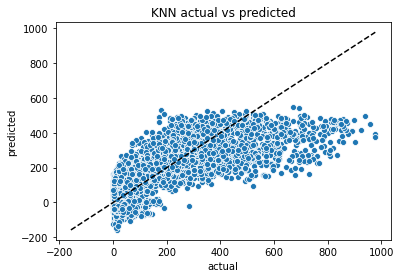

In [171]:
sns.scatterplot(y_test, predictions)
max_num = max([max(y_test), max(predictions)])
min_num = min([min(y_test), min(predictions)])
plt.plot([min_num, max_num], [min_num, max_num], color='black', linestyle='dashed') 
plt.xlabel('actual') 
plt.ylabel('predicted') 
plt.title("KNN actual vs predicted")